In [1]:
import numpy as np
import pandas as pd 
import kagglehub

# 1) Dataset download karte hain (Weight-Height dataset)
path = kagglehub.dataset_download("mustafaali96/weight-height")
df = pd.read_csv(path + "/weight-height.csv")

# sirf Height (x) aur Weight (y) lete hain
x = df["Height"].values
y = df["Weight"].values

def fit_linear_deviation(x, y):
    """
    Linear regression using deviation method (statistics formula).
    
    Formula:
        m = sum( (x - mean(x)) * (y - mean(y)) ) / sum( (x - mean(x))^2 )
        c = mean(y) - m * mean(x)
    
    Roman Urdu Explanation:
    - numerator = "sum of product of deviations"
    - denominator = "sum of square of deviations of x"
    - m slope deta hai
    - c intercept deta hai
    """
    x = np.array(x, dtype=float)
    y = np.array(y, dtype=float)
    
    x_mean = x.mean()
    y_mean = y.mean()
    
    # slope m
    numerator = np.sum((x - x_mean) * (y - y_mean))
    denominator = np.sum((x - x_mean) ** 2)
    m = numerator / denominator
    
    # intercept c
    c = y_mean - m * x_mean
    return m, c

def predict(x, m, c):
    """Prediction function: y = m*x + c"""
    return m * x + c

# 2) Fit model on dataset
m, c = fit_linear_deviation(x, y)
print(f"Slope (m): {m:.4f}")
print(f"Intercept (c): {c:.4f}")

# 3) Example prediction
sample_height = 70  # inches
predicted_weight = predict(sample_height, m, c)
print(f"Agar Height = {sample_height} inches ho to predicted Weight ≈ {predicted_weight:.2f} lbs")

# 4) Compare with first 5 actual data
y_pred = predict(x, m, c)
df["PredictedWeight"] = y_pred
print(df.head())


Slope (m): 7.7173
Intercept (c): -350.7372
Agar Height = 70 inches ho to predicted Weight ≈ 189.47 lbs
  Gender     Height      Weight  PredictedWeight
0   Male  73.847017  241.893563       219.161480
1   Male  68.781904  162.310473       180.072546
2   Male  74.110105  212.740856       221.191809
3   Male  71.730978  220.042470       202.831401
4   Male  69.881796  206.349801       188.560728


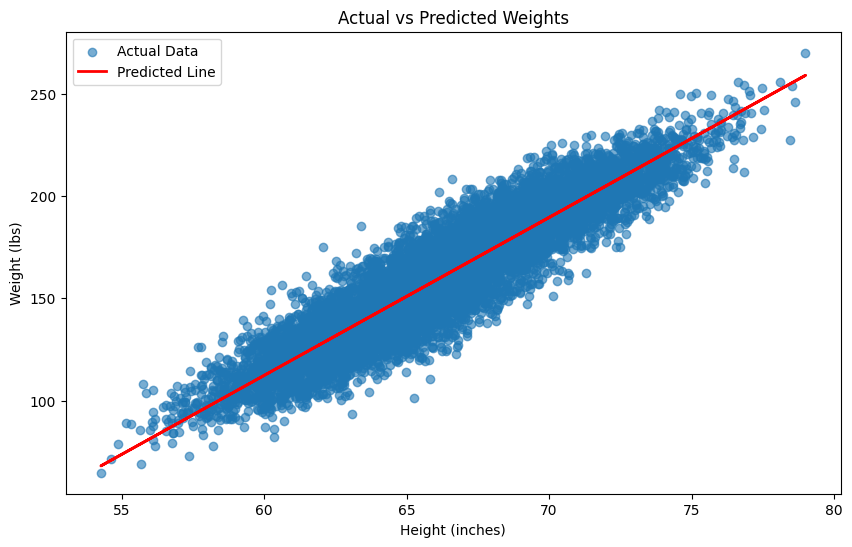

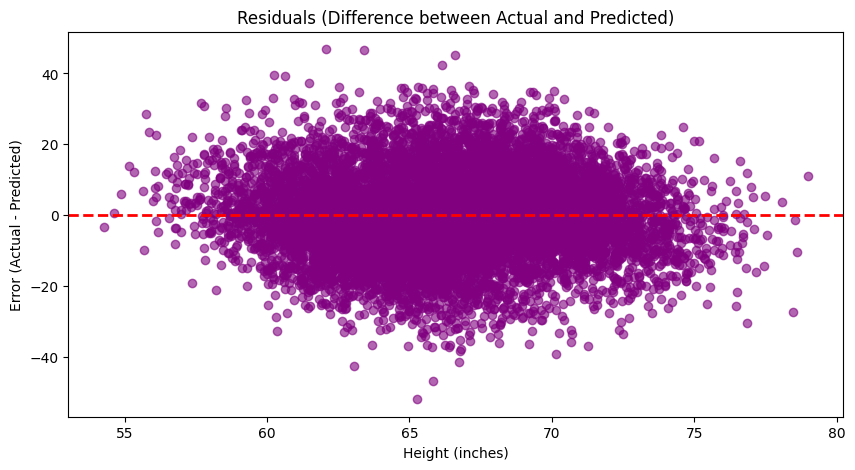

In [2]:
import matplotlib.pyplot as plt

# 5) Actual vs Predicted comparison plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label="Actual Data", alpha=0.6)
plt.plot(x, y_pred, color="red", label="Predicted Line", linewidth=2)
plt.xlabel("Height (inches)")
plt.ylabel("Weight (lbs)")
plt.title("Actual vs Predicted Weights")
plt.legend()
plt.show()

# 6) Difference (Residuals) plot
plt.figure(figsize=(10, 5))
residuals = y - y_pred
plt.scatter(x, residuals, alpha=0.6, color="purple")
plt.axhline(y=0, color="red", linestyle="--", linewidth=2)
plt.xlabel("Height (inches)")
plt.ylabel("Error (Actual - Predicted)")
plt.title("Residuals (Difference between Actual and Predicted)")
plt.show()
